In [3]:
import os
import sys

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
p = print

p('Machine: {} {}\n'.format(os.uname().sysname,os.uname().machine))
p(sys.version)

# Machine: Linux x86_64

# 3.5.2 |Anaconda custom (64-bit)| (default, Jul  2 2016, 17:53:06) 
# [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]

Machine: Linux x86_64

3.5.2 | packaged by conda-forge | (default, Jul 26 2016, 01:32:08) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


In [5]:
"""
end = '2015-01-01'
start = '2007-01-01'
get_px = lambda x: web.DataReader(x, 'yahoo', start=start, end=end)['Adj Close']

symbols = ['SPY','TLT','MSFT']
# raw adjusted close prices
data = pd.DataFrame({sym:get_px(sym) for sym in symbols})
# log returns
lrets = np.log(data/data.shift(1)).dropna()
"""

"\nend = '2015-01-01'\nstart = '2007-01-01'\nget_px = lambda x: web.DataReader(x, 'yahoo', start=start, end=end)['Adj Close']\n\nsymbols = ['SPY','TLT','MSFT']\n# raw adjusted close prices\ndata = pd.DataFrame({sym:get_px(sym) for sym in symbols})\n# log returns\nlrets = np.log(data/data.shift(1)).dropna()\n"

In [6]:
import processing
import ds
import ml
import model_saving

Using TensorFlow backend.


In [7]:
filename = '/home/octo/Dropbox'+ '/SPY29Dec.csv'

In [8]:
data=processing.get_csv_pd(filename)
data=processing.BA(data)
data=processing.preprocessing(data)
data_km=ml.kalman_ma(data)
data['km']=data_km

In [9]:
import numpy as np
data['diff']=np.where(np.logical_and(data.Open>data.km,data.spread>0),data.vwap-data.km,np.where(np.logical_and(data.Open<data.km,data.spread<0),data.vwap-data.km,0))

In [10]:
data.head()

,askPrice,askSize,bidPrice,bidSize,Open,Close,High,Low,Volume,vwap,change,liq,spread,vel,return,km,diff
2017-12-29 21:14:58.820995,267.820007,54.0,267.809998,19.0,267.815002,267.815002,267.820007,267.809998,73.0,267.817383,0.0,0.01001,-0.002380,0.01001,0.000037,257.907501,0.0
2017-12-29 21:15:00.302764,267.820007,54.0,267.809998,23.0,267.815002,267.815002,267.820007,267.809998,77.0,267.817017,0.0,0.01001,-0.002014,0.01001,0.000037,261.253743,0.0
2017-12-29 21:15:00.310661,267.820007,49.0,267.809998,23.0,267.815002,267.815002,267.820007,267.809998,72.0,267.816803,0.0,0.01001,-0.001801,0.01001,0.000037,262.946691,0.0
2017-12-29 21:15:00.323921,267.820007,49.0,267.809998,28.0,267.815002,267.815002,267.820007,267.809998,77.0,267.816345,0.0,0.01001,-0.001343,0.01001,0.000037,263.975706,0.0
2017-12-29 21:15:00.332070,267.820007,45.0,267.809998,28.0,267.815002,267.815002,267.820007,267.809998,73.0,267.816162,0.0,0.01001,-0.001160,0.01001,0.000037,264.671568,0.0


In [11]:
# log returns
lrets = np.log(data.Close/data.Close.shift(1)).dropna()

In [12]:
lrets.head()

2017-12-29 21:15:00.302764    0.0
2017-12-29 21:15:00.310661    0.0
2017-12-29 21:15:00.323921    0.0
2017-12-29 21:15:00.332070    0.0
2017-12-29 21:15:01.099807    0.0
Name: Close, dtype: float32

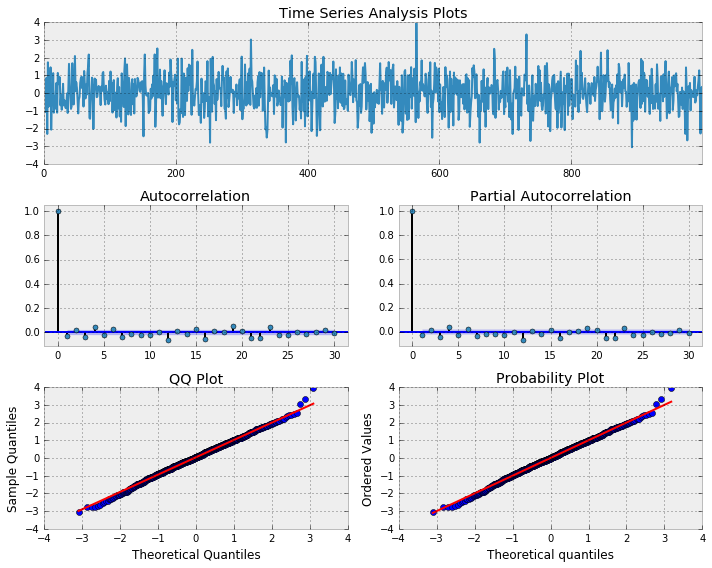

In [15]:
np.random.seed(1)

# plot of discrete white noise
randser = np.random.normal(size=1000)
tsplot(randser, lags=30)

We can see that process appears to be random and centered about zero. The autocorrelation (ACF) and partial autocorrelation (PACF) plots also indicate no significant serial correlation. Keep in mind we should see approximately 5% significance in the autocorrelation plots due to pure chance as a result of sampling from the Normal distribution. Below that we can see the QQ and Probability Plots, which compares the distribution of our data with another theoretical distribution. In this case, that theoretical distribution is the standard normal distribution. Clearly our data is distributed randomly, and appears to follow Gaussian (Normal) white noise, as it should. 

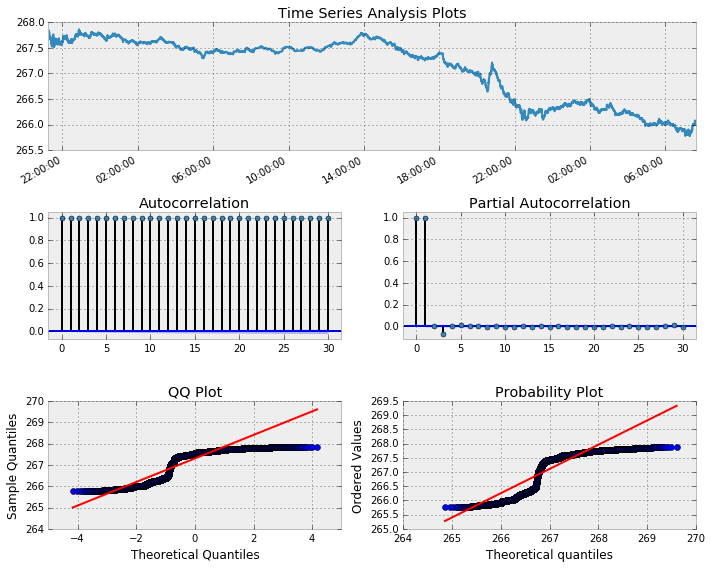

In [17]:
np.random.seed(1)
# plot of discrete white noise
tsplot(data.Close, lags=30)

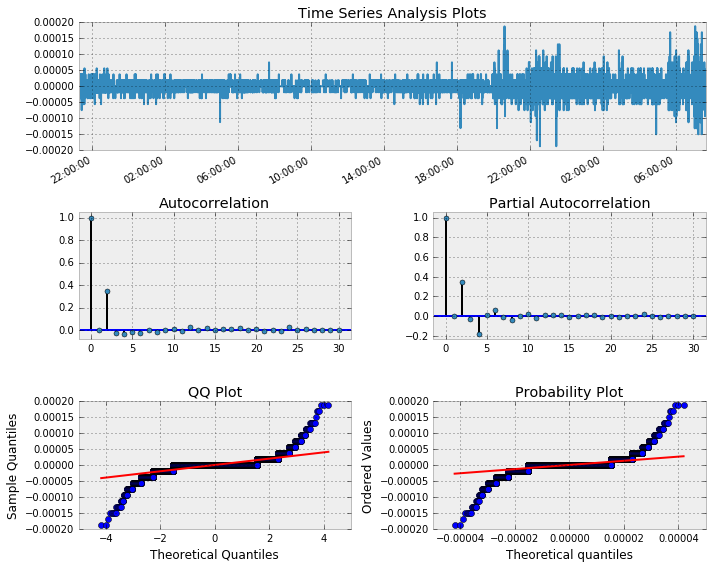

In [16]:
np.random.seed(1)
# plot of discrete white noise
tsplot(lrets, lags=30)

In [18]:
p("Random Series\n -------------\nmean: {:.3f}\nvariance: {:.3f}\nstandard deviation: {:.3f}"
.format(randser.mean(), randser.var(), randser.std()))

# Random Series
# -------------
# mean: 0.039 
# variance: 0.962
# standard deviation: 0.981

Random Series
 -------------
mean: 0.039
variance: 0.962
standard deviation: 0.981


The significance of a random walk is that it is non-stationary because the covariance between observations is time-dependent. If the TS we are modeling is a random walk it is unpredictable.

Let's simulate a random walk using the "numpy.random.normal(size=our_sample_size)" function to sample from the standard normal distribution. 

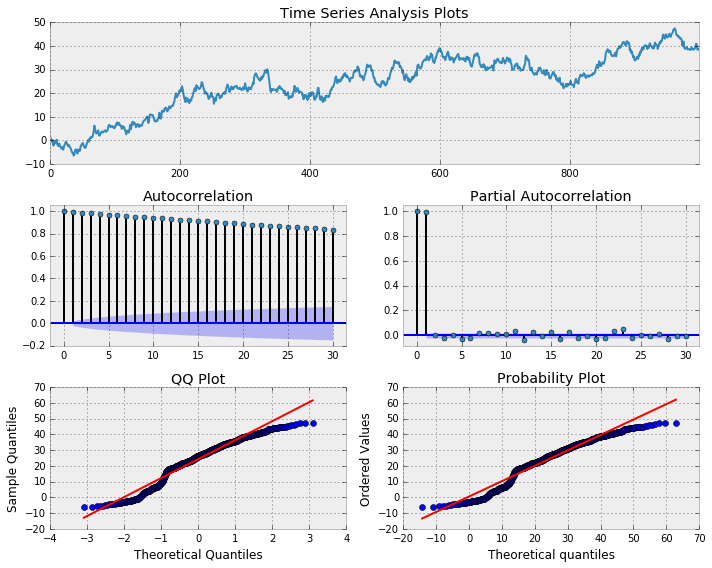

In [19]:
# Random Walk without a drift

np.random.seed(1)
n_samples = 1000

x = w = np.random.normal(size=n_samples)
for t in range(n_samples):
    x[t] = x[t-1] + w[t]

_ = tsplot(x, lags=30)

Clearly our TS is not stationary. Let's find out if the random walk model is a good fit for our simulated data. Recall that a random walk is xt = xt-1 + wt. Using algebra we can say that xt - xt-1 = wt. Thus the first differences of our random walk series should equal a white noise process! We can use the "np.diff()" function on our TS and see if this holds. 

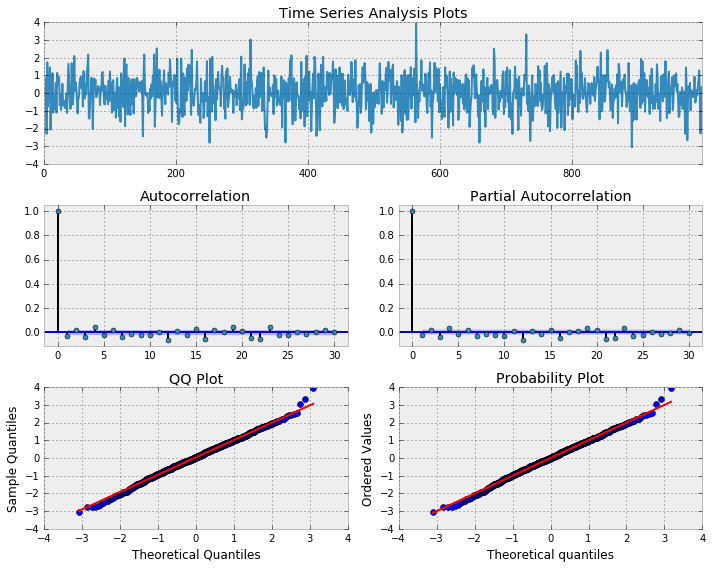

In [20]:
# First difference of simulated Random Walk series

_ = tsplot(np.diff(x), lags=30)

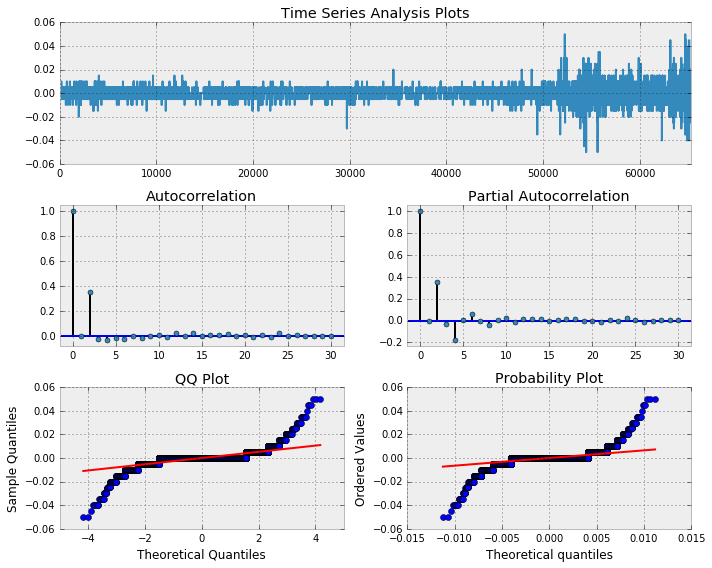

In [21]:
# First difference of SPY prices
_ = tsplot(np.diff(data.Close), lags=30)

Wow, it's quite similar to white noise. However, notice the shape of the QQ and Probability plots. This indicates that the process is close to normality but with 'heavy tails'. There also appears to be some significant serial correlation in the ACF, and PACF plots around lags 1, 5?, 16?, 18 and 21. This means that there should be better models to describe the actual price change process. 

### Linear Models

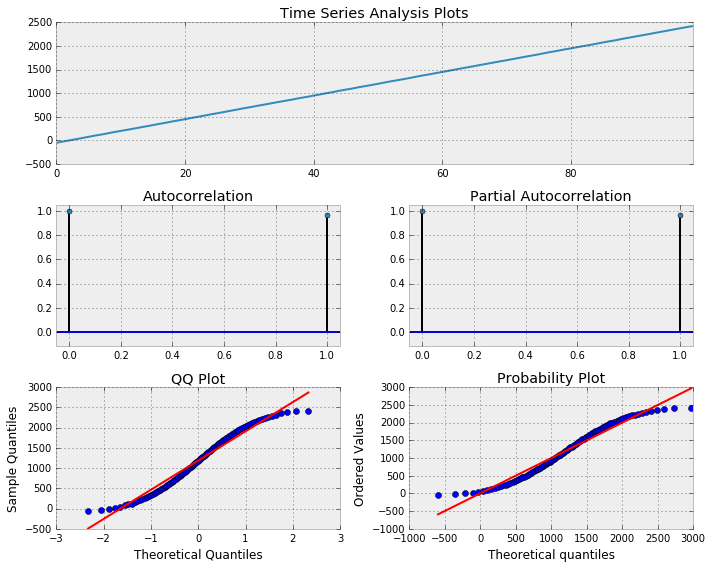

In [24]:
# simulate linear trend
# example Firm ABC sales are -$50 by default and +$25 at every time step

w = np.random.randn(100)
y = np.empty_like(w)

lags=1
b0 = -50.
b1 = 25.
for t in range(len(w)):
    y[t] = b0 + b1*t + w[t]
    
_ = tsplot(y, lags=lags)  

Here we can see that the residuals of the model are correlated and linearly decreasing as a function of the lag. The distribution is approximately normal. Before using this model to make predictions we would have to account for and remove the obvious autocorrelation present in the series. The significance of the PACF at lag 1 indicates that an autoregressive model may be appropriate.

### Log-Linear Models

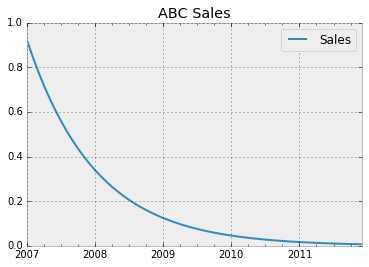

In [30]:
# Simulate ABC exponential growth

# fake dates
idx = pd.date_range('2007-01-01', '2012-01-01', freq='M')

# fake sales increasing at exponential rate
sales = [np.exp( -x/12 ) for x in range(1, len(idx)+1)]

# create dataframe and plot
df = pd.DataFrame(sales, columns=['Sales'], index=idx)

with plt.style.context('bmh'):
    df.plot()
    plt.title('ABC Sales')

We can then transform the data by taking the natural logarithm of sales. Now a linear regression is a much better fit to the data.

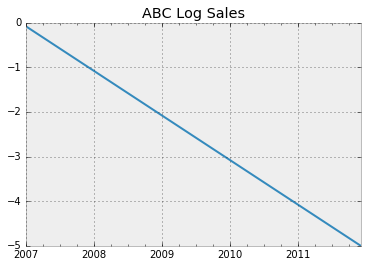

In [31]:
# ABC log sales 

with plt.style.context('bmh'):
    pd.Series(np.log(sales), index=idx).plot()
    plt.title('ABC Log Sales')

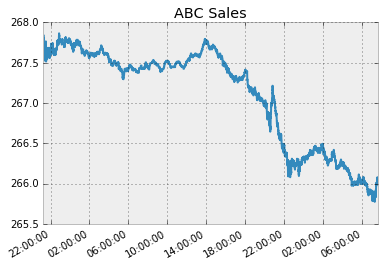

In [26]:
with plt.style.context('bmh'):
    data.Close.plot()
    plt.title('ABC Sales')

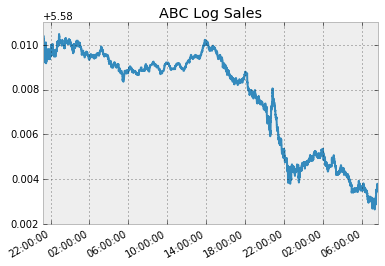

In [34]:
# ABC log sales 

with plt.style.context('bmh'):
    pd.Series(np.log(data.Close)).plot()
    plt.title('ABC Log Sales')